<a href="https://colab.research.google.com/github/TolaniSilas/thesparksfoundation_intern/blob/main/unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# Import the necessary modules and libraries.
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

The goal of this project is to predict the optimum number of clusters and representing it visually.

In [34]:
# Import the csv file as a pandas dataframe.
data = pd.read_csv("/content/drive/MyDrive/Datasets/Iris.csv")

# Check for first 10 rows of the data.
print(data.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


Firstly, let's undertsand our datasets.


In [25]:
# The shape of the data.
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

# The size of the data.
print(f"The size of the data is {data.size}.\n")

# Get the info of the data.
print(data.info())

# Get summary statistics.
print(f"\n{data.describe()}")

The dataset has 150 rows and 6 columns.
The size of the data is 900.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.

In [32]:
def return_no_duplicates(df):
    """A function that returns the number of duplicate rows in a dataframe

    Args:
        df : The working dataframe.
    """
    return f"The number of duplicate rows is {df.duplicated().sum()}."

In [31]:
# Checking for duplicates.
print(f"{return_no_duplicates(data)}\n")

# Checking for missing values in data.
print(f"The number of missing values in the data is:\n {data.isna().sum()}")

The number of duplicate rows is 0.

The number of missing values in the data is:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


As seen above, we have no duplicated rows and no missing value in each column. We can proceed with further analysis.

To predict the number of clusters, we only need the feature variables; let's obtain the necessary columns to work with.
Here, the necessary columns are SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm.

In [35]:
# Subsetting the necessary columns.
sub_data = data.drop(["Id", "Species"], axis=1)

Verify the subsetted dataset, ensuring the integrity of the selected columns, and conduct additional preprocessing steps as needed, such as checking the distribution of the feature variables for outliers.

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


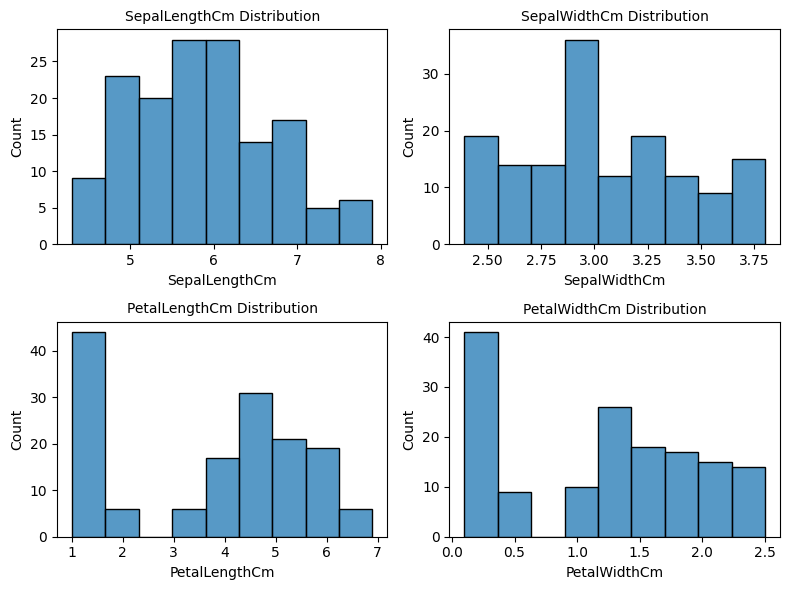

In [28]:
# Verifying the subsetted dataset.
print(sub_data.head())

# Plot the histogram distribution of the features.
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
axes = ax.flatten()

# Get the columns of the subsetted data.
cols = sub_data.columns

for i, col in zip(axes, cols):
    sns.histplot(data=sub_data, x=col, ax=i)
    i.set_title(f"{col} Distribution", fontsize=10)

# Adjust the layout.
plt.tight_layout()

3.0540000000000003
3.0


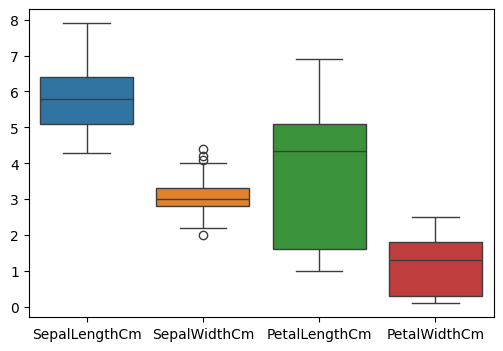

In [49]:
# Get the boxplot visualization dstribution.
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(data=sub_data, ax=ax)

print(sub_data["SepalWidthCm"].mean())
print(sub_data["SepalWidthCm"].median())

<Axes: >

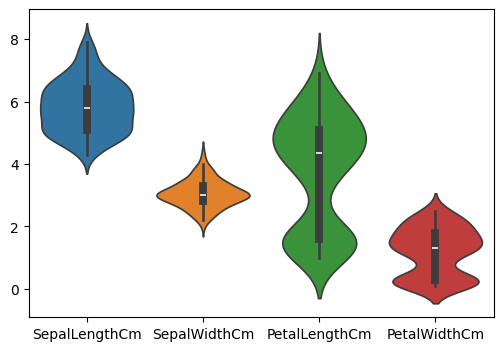

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.violinplot(data=sub_data)

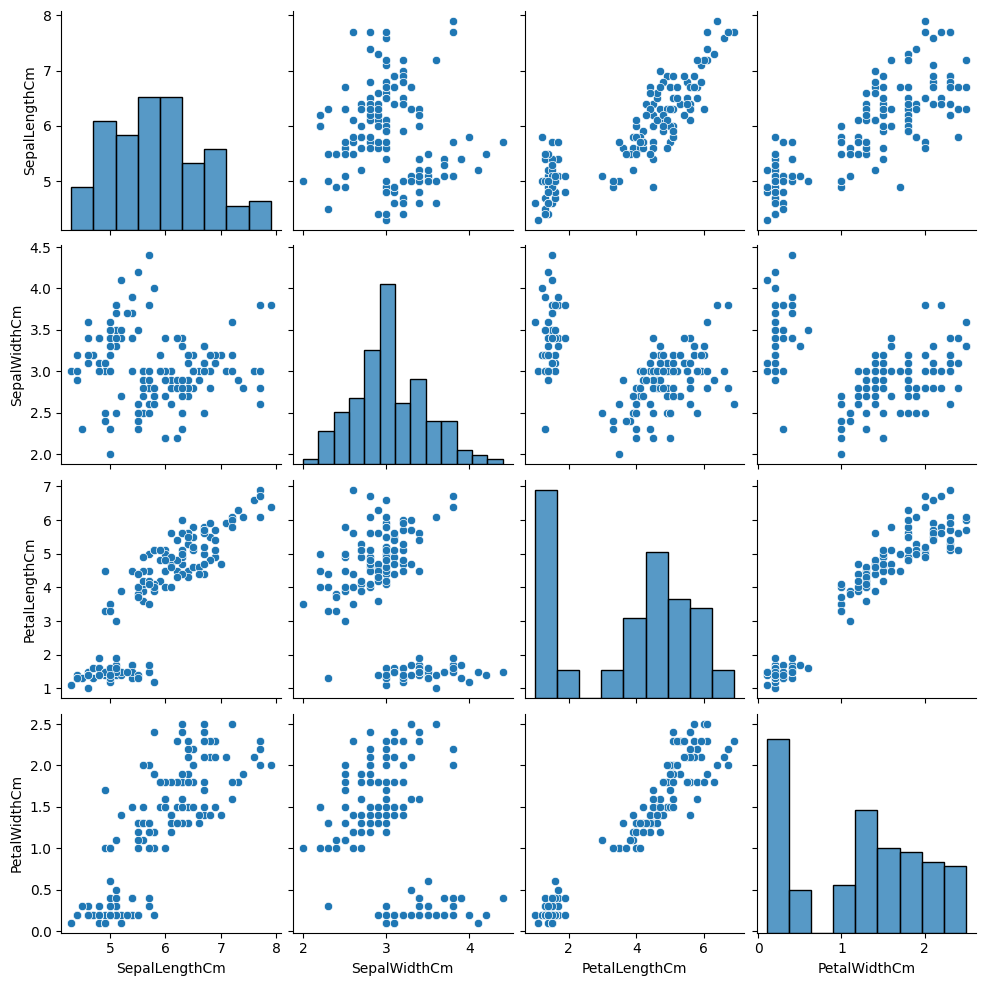

In [37]:
sns.pairplot(data=sub_data)

In [38]:
# Further exploration due to the presence of outliers.
# Calculate the first and third quartiles.
Q1 = np.quantile(sub_data["SepalWidthCm"], 0.25)
Q3 = np.quantile(sub_data["SepalWidthCm"], 0.75)

# Calculate the interquartile range (IQR).
IQR = Q3 - Q1

# Define the lower and upper thresholds for outlier detection.
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
print(upper, lower)
print(np.mean(sub_data["SepalWidthCm"]))
outliers = (sub_data["SepalWidthCm"] < lower) | (sub_data["SepalWidthCm"] > upper)
outliers_sepalw = data[outliers]
print(f"Outliers: \n{outliers_sepalw}")

4.05 2.05
3.0540000000000003
Outliers: 
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
15  16            5.7           4.4            1.5           0.4   
32  33            5.2           4.1            1.5           0.1   
33  34            5.5           4.2            1.4           0.2   
60  61            5.0           2.0            3.5           1.0   

            Species  
15      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor  


In [39]:
def detect_outliers_zscore(data, threshold=3):
    # Calculate mean and standard deviation.
    mean = np.mean(data)
    std_dev = np.std(data)

    # Calculate z-scores for each data point.
    z_scores = (data - mean) / std_dev

    # Identify outliers based on threshold.
    outliers = np.abs(z_scores) > threshold

    return outliers

outliers = detect_outliers_zscore(sub_data["SepalWidthCm"], threshold=3)
print(f"Outliers: \n{outliers_sepalw}")

Outliers: 
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
15  16            5.7           4.4            1.5           0.4   
32  33            5.2           4.1            1.5           0.1   
33  34            5.5           4.2            1.4           0.2   
60  61            5.0           2.0            3.5           1.0   

            Species  
15      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor  


In [41]:
# Handling the detecting outliers using the winsorize method.
def winsorize(data, percentile):
    """A function that reduce the effects of outliers by limiting extreme values to a specified percentile."""

    # Define the lower bound.
    lower_bound = np.percentile(data, percentile)

    # Define the upper bound.
    upper_bound = np.percentile(data, 100 - percentile)

    # Perform winsorizing on the data.
    winsorized_data = np.clip(data, lower_bound, upper_bound)

    return winsorized_data

<Axes: >

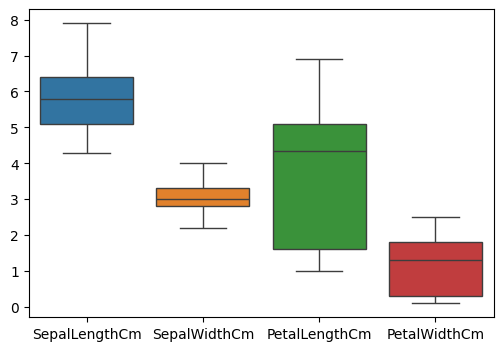

In [46]:
import copy
# Make a copy.
data_copy = sub_data.copy()

data_copy["SepalWidthCm"] = winsorize(data_copy["SepalWidthCm"], 2)

# Get the boxplot visualization dstribution after applying winsorizing.
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(data=data_copy, ax=ax)

From the summary of the descriptive statistics, the mean is not heavily affected by those datapoint outside the whisker. The mean and median are very close in value. Therefore, we will consider those datapoint in our further analysis.
After several Exploratory Data Analysis (EDA) and data preprocessing steps, the data is now ready for fitting into any algorithm.

Now, let's find the optimal number of clusters. To do so, we have to predefined the number of clusters, you will like to consider.

The mean of the winsorized data is 3.0507066666666667.
The median of the winsorized data is 3.0.


Text(0.5, 1.0, 'Distribution of SepalWidthCm')

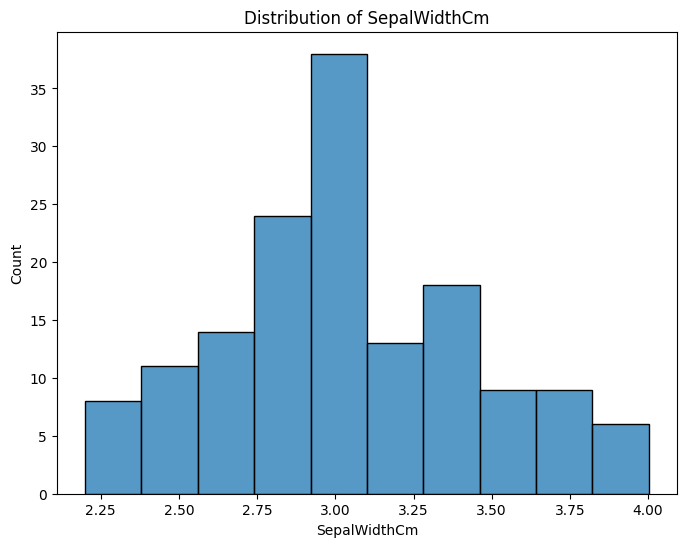

In [54]:
print("The mean of the winsorized data is {}.".format(data_copy["SepalWidthCm"].mean()))
print("The median of the winsorized data is {}.".format(data_copy["SepalWidthCm"].median()))

# Check the distribution of the winsorized data.
fig = plt.subplots(figsize=(8, 6))
sns.histplot(data=data_copy["SepalWidthCm"])
plt.title("Distribution of SepalWidthCm")

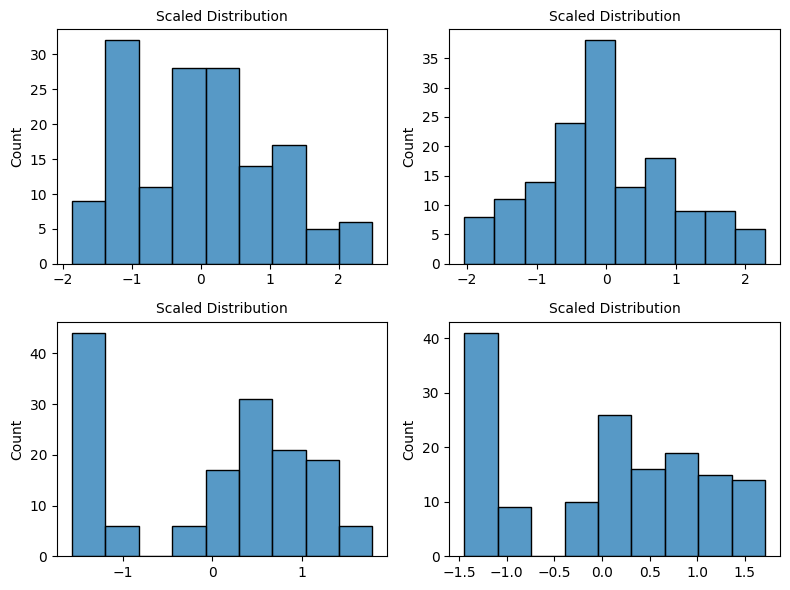

In [76]:
# Instantiate the StandardScaler Class.'
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_copy)

# Check the distribution after applying standard scaler.
# Plot the histogram distribution of the features.
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
axes = ax.flatten()

for i in range(len(axes)):
    sns.histplot(data=scaled_data[:, i], ax=axes[i])
    axes[i].set_title("Scaled Distribution", fontsize=10)

# Adjust the layout.
plt.tight_layout()

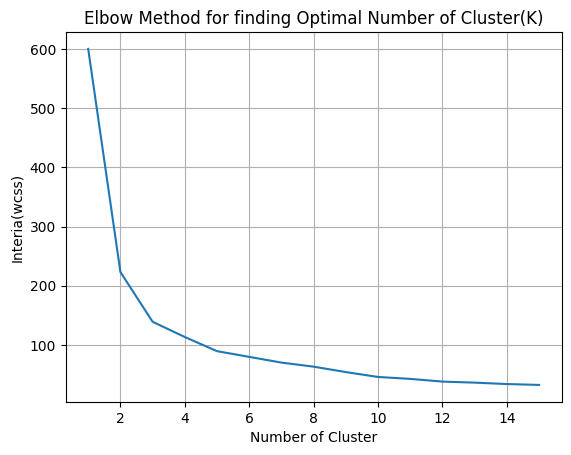

In [63]:
# Finding the optimal number of clusters.

# Initialize lists to store number of cluster, inertias, and silhouette scores.
no_cluster = []
inertias = []
silhouette_scores = []

# Loop through the kmeans algorithm up to 15 number of clusters.
for i in range(1, 16):

    # Instantiate the KMeans algorithm.
    kmeans = KMeans(n_clusters=i, max_iter=500, init="k-means++", n_init='auto', tol=0.0001 , random_state=2024)

    # Fit the data in the KMeans algo.
    kmeans.fit(scaled_data)

    # Append the number of clusters and inertia in the empty lists.
    no_cluster.append(i)
    inertias.append(kmeans.inertia_)

# Plot the inertia against number of clusters.
plt.plot(no_cluster, inertias)
plt.title("Elbow Method for finding Optimal Number of Cluster(K)")
plt.xlabel("Number of Cluster")
plt.ylabel("Interia(wcss)")
plt.grid(True)

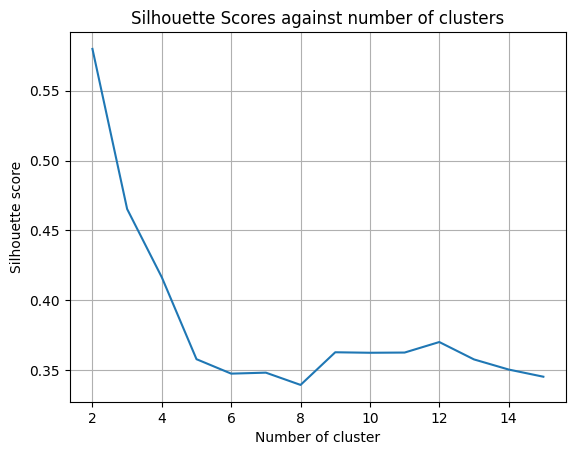

In [65]:

# Initialize lists to store silhouette scores.
silhouette_scores = []

# Specify the number of clusters.
no_clusters = range(2, 16)

# Compute silhouette scores for different K values.
for cluster in no_clusters:

    # Instantiate the KMeans algo.
    kmeans = KMeans(n_clusters=cluster, max_iter=200, init="k-means++", n_init='auto', tol=0.0001 , random_state=2024)

    cluster_labels = kmeans.fit_predict(scaled_data)

    # Find the silhouette score.
    silhouette_scor = silhouette_score(scaled_data, cluster_labels)

    # Append the silhouette score to the predefined silhouette scores list.
    silhouette_scores.append(silhouette_scor)



# Plot the silhouette_scores against number of clusters.
plt.plot(no_clusters, silhouette_scores)
plt.title("Silhouette Scores against number of clusters")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.grid(True)

In [67]:
# Apply number of clusters as 3, since 3 is the optimal k as deduced from the Elbow Method and Silhouette Score.
kmeans = KMeans(n_clusters=3, max_iter=200, init="k-means++", n_init='auto', tol=0.0001 , random_state=2024)
kmeans.fit(data_copy.values)

# Predict the cluster labels for the data
clustered_labels = kmeans.predict(data_copy.values)

# Check for unique of clustered labels and the number of counts in each labels.
print(np.unique(clustered_labels, return_counts=True))

(array([0, 1, 2], dtype=int32), array([38, 50, 62]))


In [68]:
label_df = data["Species"]
cross_tab = pd.crosstab(clustered_labels, label_df)
print(cross_tab)

Species  Iris-setosa  Iris-versicolor  Iris-virginica
row_0                                                
0                  0                2              36
1                 50                0               0
2                  0               48              14


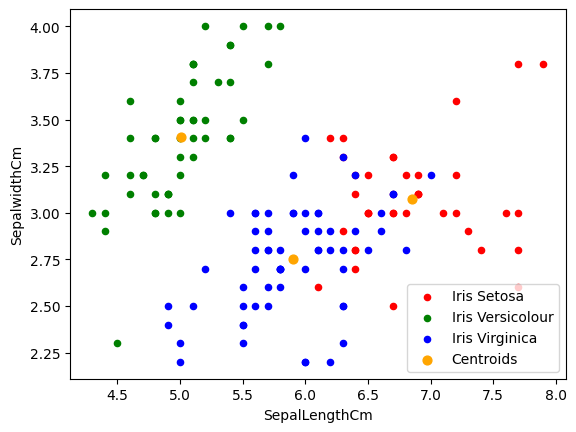

In [69]:
# Plot each clusters.
plt.scatter(data_copy.values[clustered_labels == 0, 0], data_copy.values[clustered_labels == 0, 1], s=20, color="red", label="Iris Setosa")
plt.scatter(data_copy.values[clustered_labels == 1, 0], data_copy.values[clustered_labels == 1, 1], s=20, color="green", label="Iris Versicolour")
plt.scatter(data_copy.values[clustered_labels == 2, 0], data_copy.values[clustered_labels == 2, 1], s=20, color="blue", label="Iris Virginica")

# Plot the centriod of each clusters.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=40, color="orange", label="Centroids")

plt.xlabel("SepalLengthCm")
plt.ylabel("SepalwidthCm")
plt.legend()

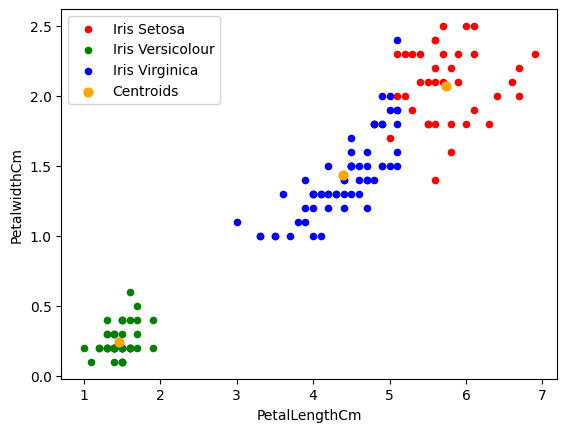

In [70]:
plt.scatter(data_copy.values[clustered_labels == 0, 2], data_copy.values[clustered_labels == 0, 3], s=20, color="red", label="Iris Setosa")
plt.scatter(data_copy.values[clustered_labels == 1, 2], data_copy.values[clustered_labels == 1, 3], s=20, color="green", label="Iris Versicolour")
plt.scatter(data_copy.values[clustered_labels == 2, 2], data_copy.values[clustered_labels == 2, 3], s=20, color="blue", label="Iris Virginica")

# Plot the centriod of each clusters.
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=40, color="orange", label="Centroids")

plt.xlabel("PetalLengthCm")
plt.ylabel("PetalwidthCm")

plt.legend()